In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

# Load csv data into a dataframe
df = pd.read_csv('chile_news_2019_10_01_to_2019_11_01_with_link.csv')
df.head()


Unnamed: 0.1  Unnamed: 0            User              TweetCreated   
0             0           0  meganoticiascl  2019-10-31T23:37:59.000Z  \
1             1           1  meganoticiascl  2019-10-31T23:06:40.000Z   
2             2           2  meganoticiascl  2019-10-31T23:03:55.000Z   
3             3           3  meganoticiascl  2019-10-31T22:38:04.000Z   
4             4           4  meganoticiascl  2019-10-31T22:21:32.000Z   

               TweetId                                               Link   
0  1190050315481100293  https://twitter.com/meganoticiascl/status/1190...  \
1  1190042433117024256  https://twitter.com/meganoticiascl/status/1190...   
2  1190041740457250816  https://twitter.com/meganoticiascl/status/1190...   
3  1190035237050474497  https://twitter.com/meganoticiascl/status/1190...   
4  1190031075885690881  https://twitter.com/meganoticiascl/status/1190...   

                                            Contents  
0  Manifestantes con disfraces se toman la marcha...  
1  🔴 LO ÚLTIMO: Ahora varias manifestaciones a lo...  
2  Marcelo Salas y movilizaciones sociales: "Lo q...  
3  Nueva jornada de masivas marchas en Santiago y...  
4  Sismo afecta a la zona central del país\n\nhtt...

## Sentiment Analysis:
- **What?** A method to determine if text (e.g., tweets, reviews) is positive, negative, or neutral.
- **How?** Uses algorithms trained on vast data to recognize sentiment cues in new texts.
- **Why?** Understand feelings or moods in texts, like gauging public opinion or customer feedback.

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# VADER sentiment analysis (though primarily for English, it can be fairly robust on other languages too)
analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment_vader(tweet):
    vs = analyzer.polarity_scores(tweet)
    return vs['compound']

df['Sentiment'] = df['Contents'].apply(analyze_sentiment_vader)

<Axes: >

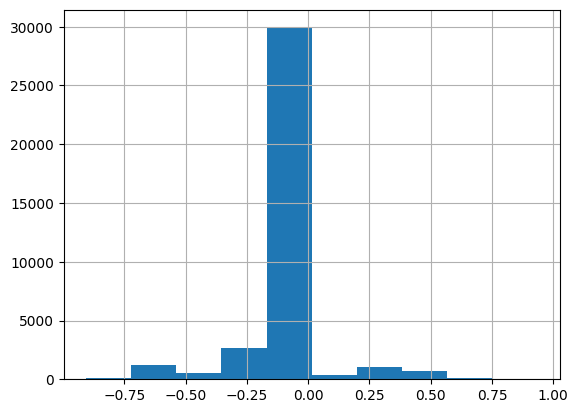

In [3]:
# Histogram of sentiments.
# Slightly negative is by far the most common
df.Sentiment.hist()

In [4]:

# Print sentiment statistics for each user
for user in df['User'].unique():
    avg_sentiment = df[df['User'] == user]['Sentiment'].mean()
    print(f"Average sentiment for {user}: {avg_sentiment}")

Average sentiment for meganoticiascl: -0.013136520442930153
Average sentiment for Cooperativa: -0.03399516776231538
Average sentiment for biobio: -0.035163689747981404
Average sentiment for elmostrador: -0.0512841511285574
Average sentiment for publimetroChile: -0.05319590366869232
Average sentiment for CNNChile: -0.036039238721804506
Average sentiment for adnradiochile: -0.02968028359216746
Average sentiment for T13: 0.013990520405959838


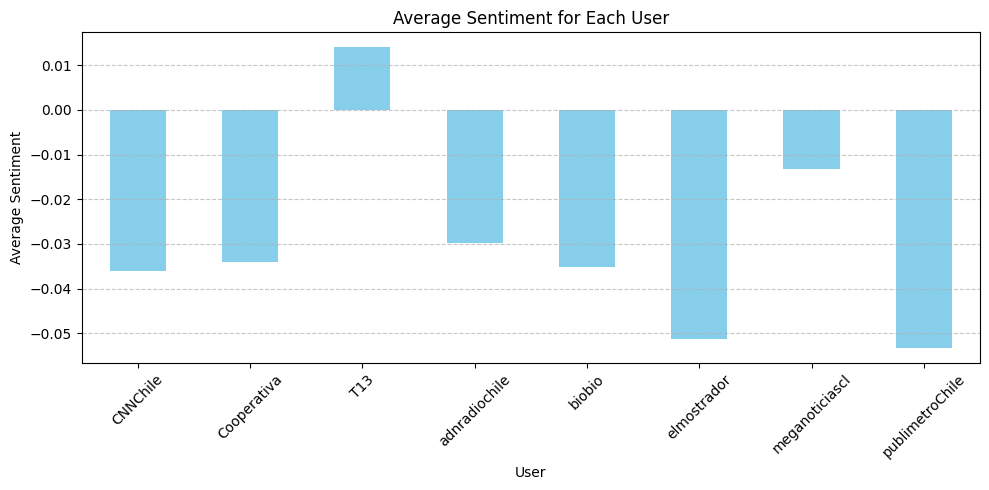

In [5]:
def plot_sentiments(df):
    """
    Plots the average sentiment for each user in the provided dataframe.
    
    Args:
    - df (pd.DataFrame): DataFrame containing the user and sentiment data
    
    Returns:
    - None (Displays a bar plot)
    """
    # Calculate the average sentiment for each user
    avg_sentiments = df.groupby('User')['Sentiment'].mean()

    # Plot
    plt.figure(figsize=(10, 5))
    avg_sentiments.plot(kind='bar', color='skyblue')

    plt.title('Average Sentiment for Each User')
    plt.ylabel('Average Sentiment')
    plt.xlabel('User')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

plot_sentiments(df)

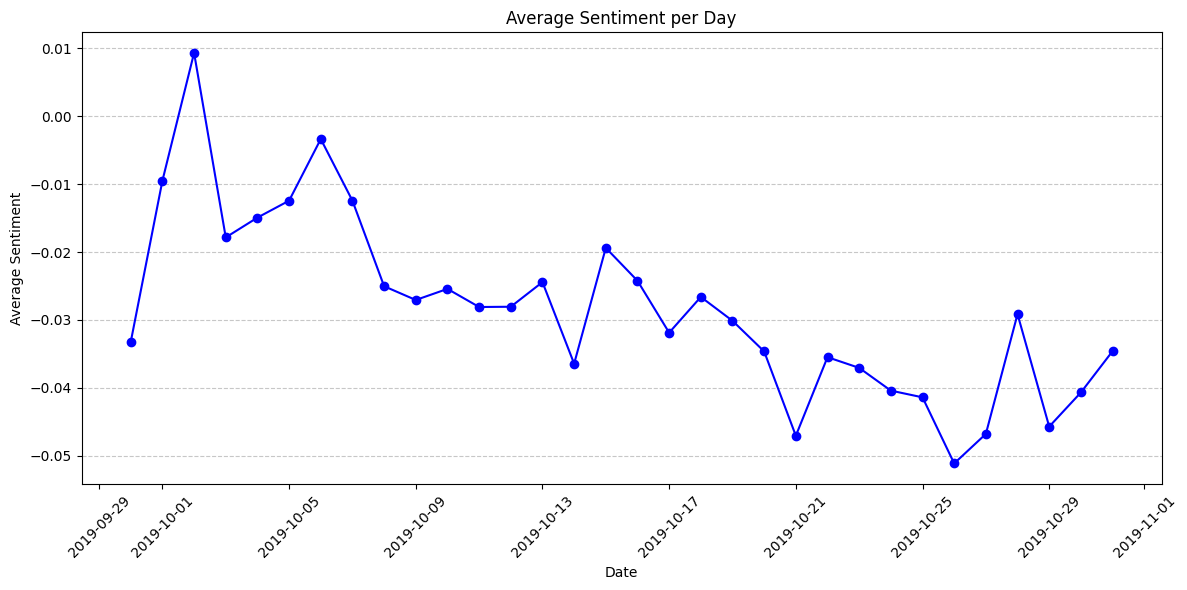

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_sentiment(df):
    """
    Plots average sentiment per day from a DataFrame of tweets.
    
    Parameters:
    - df: DataFrame containing a 'TweetCreated' column with timestamp and a 'Sentiment' column with sentiment scores.
    
    Returns:
    - A plot of average sentiment per day.
    """
    
    # Ensure 'TweetCreated' is a datetime object
    df['TweetCreated'] = pd.to_datetime(df['TweetCreated'])
    
    # Extract just the date part
    df['Date'] = df['TweetCreated'].dt.date
    
    # Group by Date and calculate mean sentiment
    daily_sentiment = df.groupby('Date')['Sentiment'].mean()
    
    # Plotting
    plt.figure(figsize=(12, 6))
    daily_sentiment.plot(linestyle='-', marker='o', color='blue')
    plt.title('Average Sentiment per Day')
    plt.ylabel('Average Sentiment')
    plt.xlabel('Date')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

# To use the function:
plot_daily_sentiment(df)

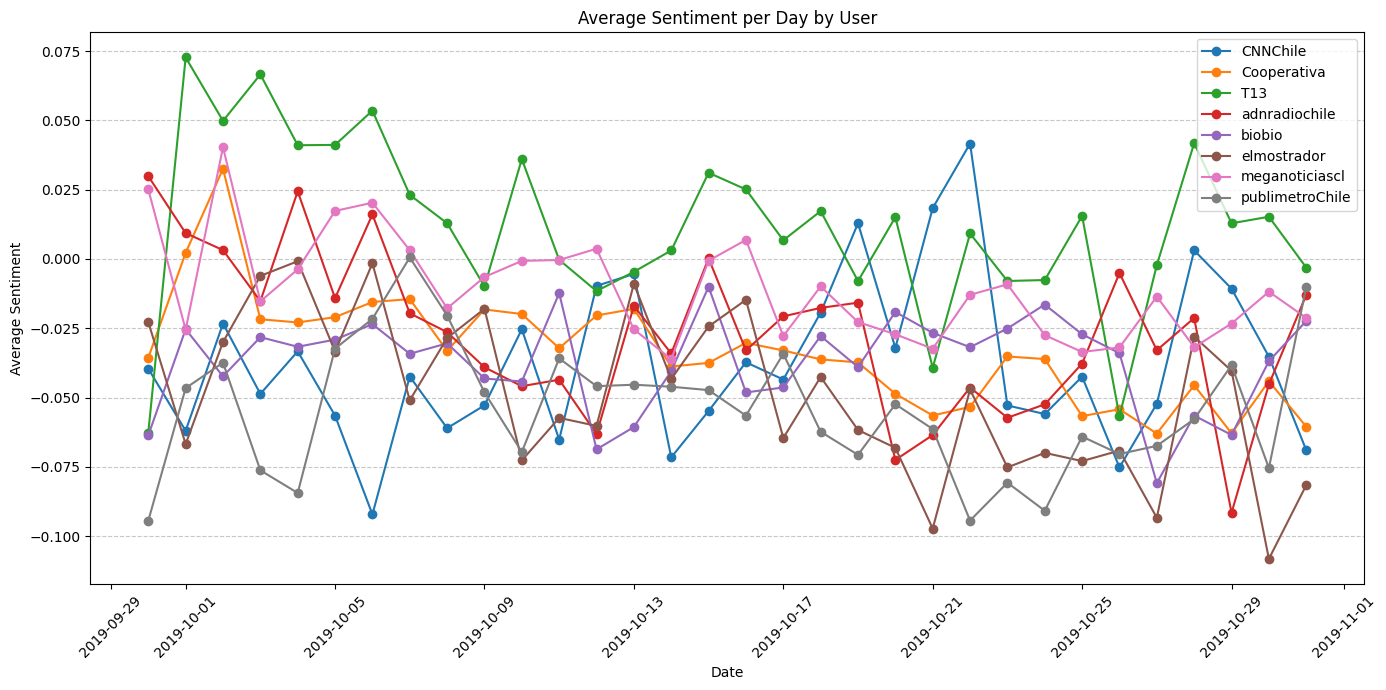

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_daily_sentiment_per_user(df):
    """
    Plots daily sentiment for each user from a DataFrame of tweets.
    
    Parameters:
    - df: DataFrame containing a 'TweetCreated' column with timestamp, a 'Sentiment' column with sentiment scores,
          and a 'User' column with user names.
    
    Returns:
    - A plot of daily sentiment for each user.
    """
    
    # Ensure 'TweetCreated' is a datetime object
    df['TweetCreated'] = pd.to_datetime(df['TweetCreated'])
    
    # Extract just the date part
    df['Date'] = df['TweetCreated'].dt.date
    
    # Group by Date and User, then calculate mean sentiment
    daily_sentiment_per_user = df.groupby(['Date', 'User'])['Sentiment'].mean().unstack()
    
    # Plotting
    plt.figure(figsize=(14, 7))
    
    # Loop over each user and plot their daily sentiment
    for user in daily_sentiment_per_user.columns:
        daily_sentiment_per_user[user].plot(linestyle='-', marker='o', label=user)
    
    plt.title('Average Sentiment per Day by User')
    plt.ylabel('Average Sentiment')
    plt.xlabel('Date')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Rotate x-axis labels
    plt.xticks(rotation=45)
    
    plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

plot_daily_sentiment_per_user(df)

## Word Clouds:

- **What?** A visual representation where word frequency determines its size.
- **How?** By counting each word's appearance in a text; "stopwords" (common words) are often removed for clarity.
- **Why?** Quickly grasp primary themes or topics in large datasets.

In [8]:
# Define words to exclude from wordcloud

stopwords = set([
    "https", "t", "co",    # Non-content words from tweets
    "y",                   # "and"
    "de",                  # "of"
    "la",                  # "the" (feminine singular)
    "el",                  # "the" (masculine singular)
    "los",                 # "the" (masculine plural)
    "las",                 # "the" (feminine plural)
    "le",                  # object pronoun, roughly "to him/her"
    "en",                  # "in" or "on"
    "a",                   # "to"
    "con",                 # "with"
    "por",                 # "for" or "by"
    "para",                # "for" or "to"
    "es",                  # "is"
    "son",                 # "are"
    "un",                  # "a" or "an" (masculine)
    "una",                 # "a" or "an" (feminine)
    "su",                  # "his", "her", "its", or "your" (formal)
    "se",                  # reflexive pronoun
    "del",                 # "of the" (contraction of "de" and "el")
    "al",                  # "to the" (contraction of "a" and "el")
    "lo",                  # neuter article or direct object pronoun
    "que"                  # what
])

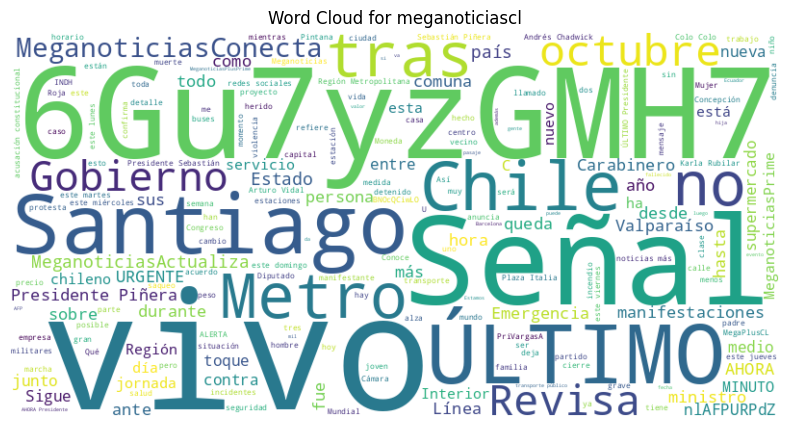

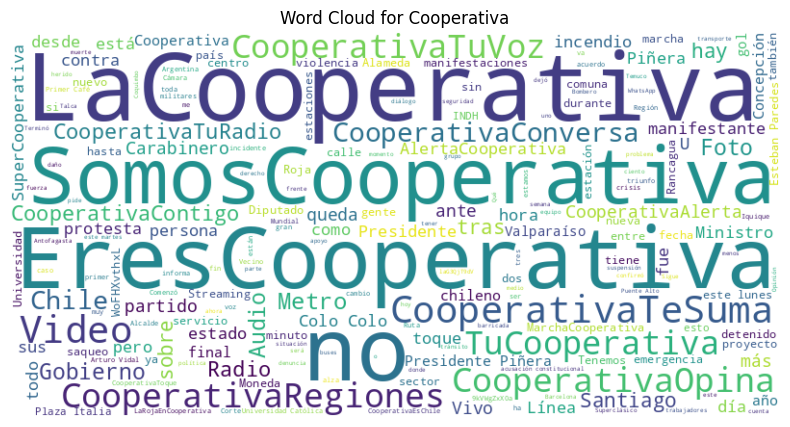

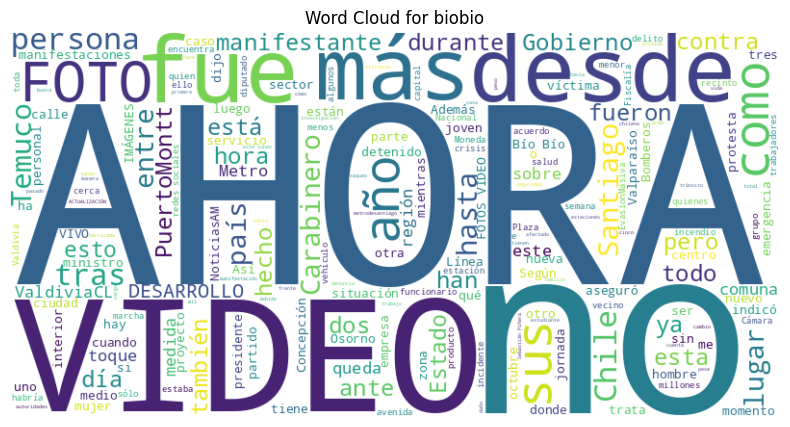

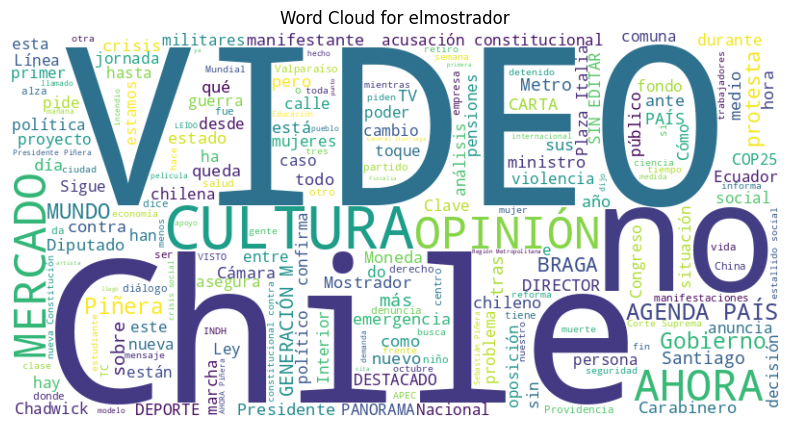

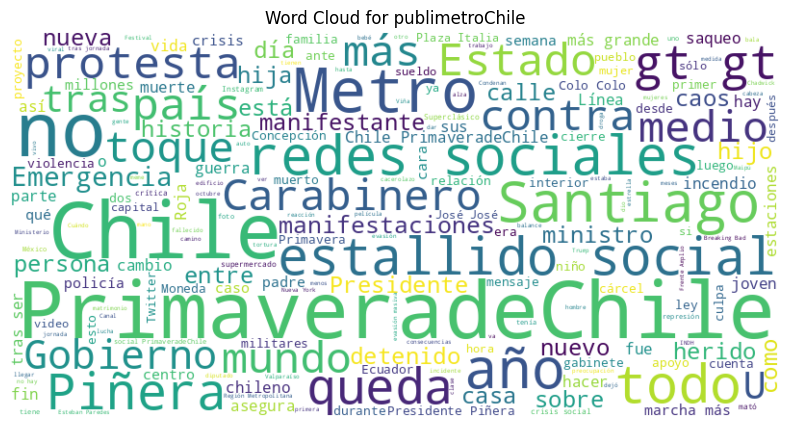

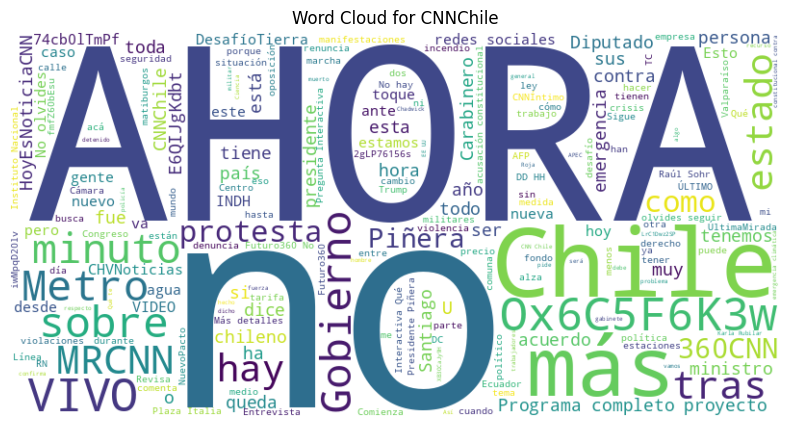

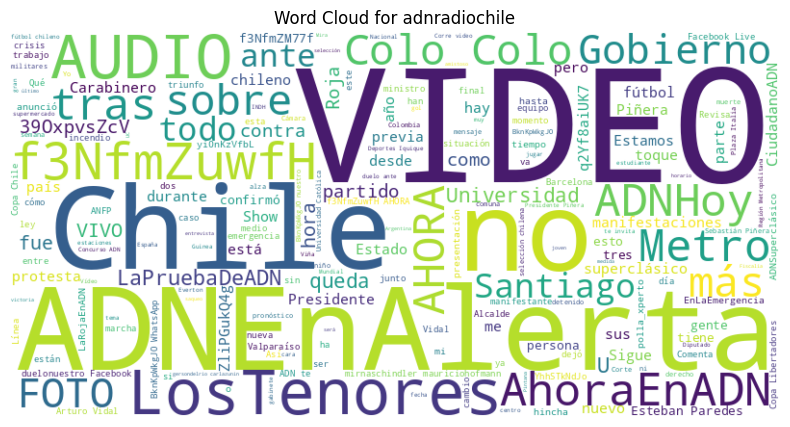

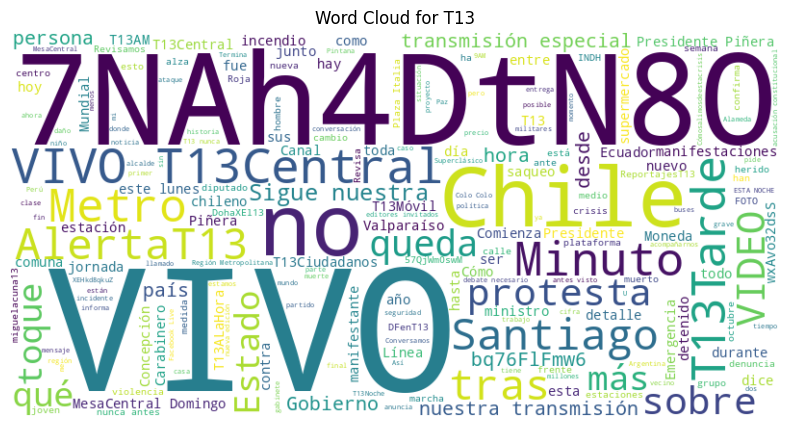

In [9]:
# Word clouds for each user

def generate_word_clouds(dataframe, stopwords):

    # Create word clouds for each user
    for user in dataframe['User'].unique():
        user_tweets = dataframe[dataframe['User'] == user]['Contents'].str.cat(sep=' ')
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(user_tweets)
        
        # Display the generated image:
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud for {user}")
        plt.show()

# Usage example:
generate_word_clouds(df, stopwords)

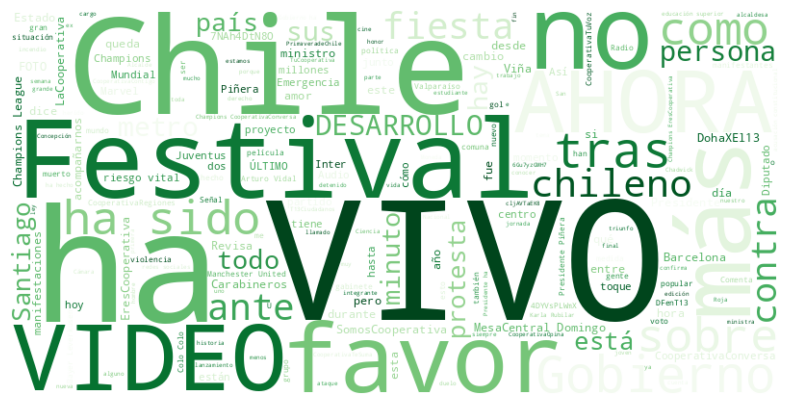

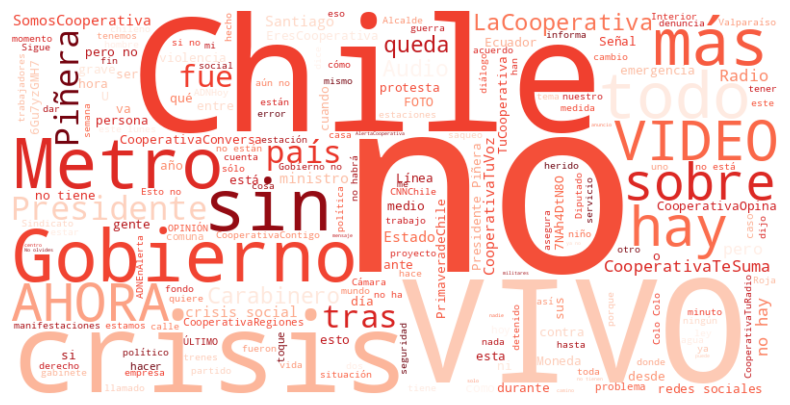

In [10]:
# Split the dataframe based on sentiment
positive_tweets = df[df['Sentiment'] > 0.25]['Contents'].str.cat(sep=' ')
negative_tweets = df[df['Sentiment'] < -0.25]['Contents'].str.cat(sep=' ')

# Create word clouds
def generate_wordcloud(text, color, stopwords):
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap=color).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate positive and negative word clouds
generate_wordcloud(positive_tweets, 'Greens', stopwords)
generate_wordcloud(negative_tweets, 'Reds', stopwords)
